WEB SCRIPING PROJECT

In [1]:
# imports

from bs4 import BeautifulSoup # For HTML parsing
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
import pandas as pd # For converting results to a dataframe and bar chart plots
import json # For parsing json
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# web Canadian Appliance Source
def get_page(x):
    url=f'https://www.canadianappliance.ca/Refrigerators-And-Fridges-3/?page={x}'
    result = requests.get(url)
    soup = BeautifulSoup(result.content)
    return soup

In [37]:
# get page
cas_item_list={'brand':[],'model':[],'price':[],'category':[],'size':[],'description':[]}
for num in range(1,4):
    soup=soup=get_page(num)
    for brand in soup.find_all('div', class_='product-tile-title-block'):
        cas_item_list['brand'].append(brand.get_text(strip=True).split('In')[0].split('Just')[0].split(' ')[0])
    for model in soup.find_all('div', class_='product-tile-title-block'):
        cas_item_list['model'].append(model.get_text(strip=True).split('In')[0].split('Just')[0].split(' ')[1])   
    for price in soup.find_all('td', class_='pi-price-final'):
        if len(price.get_text(strip=True).split('Ships')[0]) == 'null':
            cas_item_list['price'].append('NA')
        else:
            cas_item_list['price'].append(float(price.get_text(strip=True).split('Ships')[0].replace('$','').replace(',','')))
    for category in soup.find_all('div', class_='pi-product-desc-name'):
        cas_item_list['category'].append(category.get_text(strip=True).split('Refrigerator')[0])
    for size in soup.find_all('div', class_='pi-product-desc-name'):
        if len(size.get_text(strip=True).split('Refrigerator')) >1:
            cas_item_list['size'].append(size.get_text(strip=True).split('Refrigerator')[1].split('Width')[0])
        else:
            cas_item_list['size'].append('NA')
    for description in soup.find_all('div', class_='pi-product-desc-name'):
        if len(description.get_text(strip=True).split('Refrigerator')) >1:
            cas_item_list['description'].append(description.get_text(strip=True).split('Refrigerator')[1].split('Width')[1:])
        else:
            cas_item_list['description'].append('NA')
    sleep(2)

In [38]:
len(cas_item_list['price'])

144

In [39]:
cas_item_list2={'brand':[],'model':[],'price':[],'category':[],'size':[],'description':[]}
for num in range(5,6):
    soup=get_page(num)
    for brand in soup.find_all('div', class_='product-tile-title-block'):
        cas_item_list2['brand'].append(brand.get_text(strip=True).split('In')[0].split('Just')[0].split(' ')[0])
    for model in soup.find_all('div', class_='product-tile-title-block'):
        cas_item_list2['model'].append(model.get_text(strip=True).split('In')[0].split('Just')[0].split(' ')[1]) 
    for price in soup.find_all('td', class_='pi-price-final'):
        if len(price.get_text(strip=True).split('Ships')[0]) == 'null':
            cas_item_list2['price'].append('NA')
        else:
            cas_item_list2['price'].append(float(price.get_text(strip=True).split('Ships')[0].replace('$','').replace(',','')))
    for category in soup.find_all('div', class_='pi-product-desc-name'):
        cas_item_list2['category'].append(category.get_text(strip=True).split('Refrigerator')[0])
    for size in soup.find_all('div', class_='pi-product-desc-name'):
        if len(size.get_text(strip=True).split('Refrigerator')) >1:
            cas_item_list2['size'].append(size.get_text(strip=True).split('Refrigerator')[1].split('Width')[0])
        else:
            cas_item_list2['size'].append('NA')
    for description in soup.find_all('div', class_='pi-product-desc-name'):
        if len(description.get_text(strip=True).split('Refrigerator')) >1:
            cas_item_list2['description'].append(description.get_text(strip=True).split('Refrigerator')[1].split('Width')[1:])
        else:
            cas_item_list2['description'].append('NA')
    sleep(2)


In [40]:
cas_item_list3={'brand':[],'model':[],'price':[],'category':[],'size':[],'description':[]}
for num in range(7,8):
    soup=get_page(num)
    for brand in soup.find_all('div', class_='product-tile-title-block'):
        cas_item_list3['brand'].append(brand.get_text(strip=True).split('In')[0].split('Just')[0].split(' ')[0])
    for model in soup.find_all('div', class_='product-tile-title-block'):
        cas_item_list3['model'].append(model.get_text(strip=True).split('In')[0].split('Just')[0].split(' ')[1]) 
    for price in soup.find_all('td', class_='pi-price-final'):
        if len(price.get_text(strip=True).split('Ships')[0]) == 'null':
            cas_item_list3['price'].append('NA')
        else:
            cas_item_list3['price'].append(float(price.get_text(strip=True).split('Ships')[0].replace('$','').replace(',','')))
    for category in soup.find_all('div', class_='pi-product-desc-name'):
        cas_item_list3['category'].append(category.get_text(strip=True).split('Refrigerator')[0])
    for size in soup.find_all('div', class_='pi-product-desc-name'):
        if len(size.get_text(strip=True).split('Refrigerator')) >1:
            cas_item_list3['size'].append(size.get_text(strip=True).split('Refrigerator')[1].split('Width')[0])
        else:
            cas_item_list3['size'].append('NA')
    for description in soup.find_all('div', class_='pi-product-desc-name'):
        if len(description.get_text(strip=True).split('Refrigerator')) >1:
            cas_item_list3['description'].append(description.get_text(strip=True).split('Refrigerator')[1].split('Width')[1:])
        else:
            cas_item_list3['description'].append('NA')
    sleep(2)


In [41]:
pl=pd.DataFrame(cas_item_list)
pl2=pd.DataFrame(cas_item_list2)
pl3=pd.DataFrame(cas_item_list3)

In [42]:
pl_to=pd.concat([pl,pl2,pl3])
pl_to

,brand,model,price,category,size,description
0,LG,LRFCS2503S,1994.99,French Door,"33""",[ENERGY STAR Certified25.1 cu. ft. CapacityFre...
1,LG,LRFXS2503S,2494.99,French Door,"33""",[ENERGY STAR Certified24.5 cu. ft. CapacityThr...
2,LG,LRFNS2200S,1794.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityOpt...
3,Samsung,RF22A4111SR,1594.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityFre...
4,LG,LFXS28968S,2608.40,French Door,"36""",[ENERGY STAR Certified27.9 cu. ft. CapacityThr...
...,...,...,...,...,...,...
43,GE,GTS18FTLKWW,1294.00,Top Mount,"30""",[18.0 cu. ft. CapacityLED LightingWhite colour]
44,Whirlpool,WRF757SDHV,3394.99,French Door,"36""",[26.8 cu. ft. CapacityThru Door Ice DispenserE...
45,Silhouette,SPRWC140D1SS,3469.99,"Wine Cooler24"" Width129 Wine Bottle CapacitySt...",NA,NA
46,Haier,HEBF100BXS,464.00,"Beverage Center20 1/2"" WidthStainless Steel co...",NA,NA


In [43]:
pl_to['mean']=pl_to.groupby('brand')['price'].transform('mean')

In [44]:
pl_to['std']=pl_to.groupby('brand')['price'].transform('std')

In [45]:
pl_to

,brand,model,price,category,size,description,mean,std
0,LG,LRFCS2503S,1994.99,French Door,"33""",[ENERGY STAR Certified25.1 cu. ft. CapacityFre...,2472.311304,941.403767
1,LG,LRFXS2503S,2494.99,French Door,"33""",[ENERGY STAR Certified24.5 cu. ft. CapacityThr...,2472.311304,941.403767
2,LG,LRFNS2200S,1794.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityOpt...,2472.311304,941.403767
3,Samsung,RF22A4111SR,1594.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityFre...,2628.390556,914.327385
4,LG,LFXS28968S,2608.40,French Door,"36""",[ENERGY STAR Certified27.9 cu. ft. CapacityThr...,2472.311304,941.403767
...,...,...,...,...,...,...,...,...
43,GE,GTS18FTLKWW,1294.00,Top Mount,"30""",[18.0 cu. ft. CapacityLED LightingWhite colour],2363.227500,1578.286647
44,Whirlpool,WRF757SDHV,3394.99,French Door,"36""",[26.8 cu. ft. CapacityThru Door Ice DispenserE...,1970.260270,650.438897
45,Silhouette,SPRWC140D1SS,3469.99,"Wine Cooler24"" Width129 Wine Bottle CapacitySt...",NA,NA,1723.962222,748.326674
46,Haier,HEBF100BXS,464.00,"Beverage Center20 1/2"" WidthStainless Steel co...",NA,NA,1079.000000,869.741341


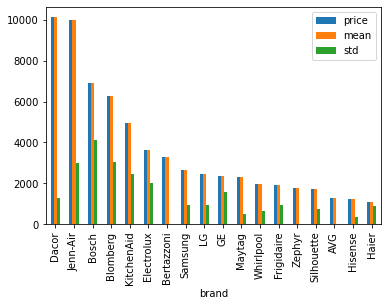

In [46]:
name1=pl_to.groupby('brand').mean().sort_values('price',ascending=False).plot(kind='bar');

In [47]:
LG=pl_to[pl_to['brand']=='LG']
len(LG)


46

In [48]:
GE=pl_to[pl_to['brand']=='GE']
len(GE)

32

In [49]:
Samsung=pl_to[pl_to['brand']=='Samsung']
len(Samsung)

36

In [50]:
LG

,brand,model,price,category,size,description,mean,std
0,LG,LRFCS2503S,1994.99,French Door,"33""",[ENERGY STAR Certified25.1 cu. ft. CapacityFre...,2472.311304,941.403767
1,LG,LRFXS2503S,2494.99,French Door,"33""",[ENERGY STAR Certified24.5 cu. ft. CapacityThr...,2472.311304,941.403767
2,LG,LRFNS2200S,1794.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityOpt...,2472.311304,941.403767
4,LG,LFXS28968S,2608.40,French Door,"36""",[ENERGY STAR Certified27.9 cu. ft. CapacityThr...,2472.311304,941.403767
6,LG,LFXC22526S,2694.99,French Door,"36""",[ENERGY STAR CertifiedCounter Depth22.0 cu. ft...,2472.311304,941.403767
7,LG,LFCC22426S,2394.99,French Door,"36""",[ENERGY STAR CertifiedCounter Depth23.0 cu. ft...,2472.311304,941.403767
8,LG,LRFWS2200S,1994.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityFre...,2472.311304,941.403767
12,LG,LTCS20020S,996.40,Top Mount,"30""",[ENERGY STAR Certified20.2 cu. ft. CapacityOpt...,2472.311304,941.403767
13,LG,LRFWS2906S,2494.99,French Door,"36""",[ENERGY STAR Certified29.0 cu. ft. CapacityFre...,2472.311304,941.403767
14,LG,LFXS26973S,2481.13,French Door,"36""",[ENERGY STAR Certified26.2 cu. ft. CapacityFre...,2472.311304,941.403767


In [51]:
LG.sort_values(by ='category',inplace=True)
LG

/var/folders/j4/vrjcv_wj13l3d45mr8hr2wmm0000gn/T/ipykernel_29139/2580146250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LG.sort_values(by ='category',inplace=True)


,brand,model,price,category,size,description,mean,std
24,LG,LSBNC1021P,1999.99,Bottom Mount,"22""",[ENERGY STAR CertifiedCounter Depth9.0 cu. ft....,2472.311304,941.403767
62,LG,LBNC15251V,1494.99,Bottom Mount,"28""",[ENERGY STAR Certified14.7 cu. ft. CapacityLED...,2472.311304,941.403767
57,LG,LRDCS2603S,1894.99,Bottom Mount,"33""",[ENERGY STAR Certified26 cu ft cu. ft.LED Ligh...,2472.311304,941.403767
26,LG,LRDNS2200S,1595.40,Bottom Mount,"30""",[ENERGY STAR Certified22 cu.ft cu. ft.Interior...,2472.311304,941.403767
76,LG,LBNC12231V,1145.40,Bottom Mount,"24""",[ENERGY STAR CertifiedCounter Depth11.9 cu. ft...,2472.311304,941.403767
70,LG,LRONC1404V,1244.99,Column,"24""",[14.0 cu. ft. CapacityPlatinum Silver colour],2472.311304,941.403767
35,LG,LRDNC1004W,994.99,Counter Depth,"24""",[ENERGY STAR CertifiedCounter Depth10.4 cu. ft...,2472.311304,941.403767
126,LG,LRDNC1004V,1044.99,Counter Depth,"24""",[ENERGY STAR CertifiedCounter Depth10.4 cu. ft...,2472.311304,941.403767
113,LG,LFXS28968D,3094.99,French Door,"36""",[ENERGY STAR Certified27.9 cu. ft. CapacityThr...,2472.311304,941.403767
110,LG,LRMXS2806S,3194.99,French Door,28 cu. ft. cu. ft.Thru Door Ice DispenserExter...,[],2472.311304,941.403767


In [57]:
bagget= LG[LG['price']<=2500]
bagget

,brand,model,price,category,size,description,mean,std
24,LG,LSBNC1021P,1999.99,Bottom Mount,"22""",[ENERGY STAR CertifiedCounter Depth9.0 cu. ft....,2472.311304,941.403767
62,LG,LBNC15251V,1494.99,Bottom Mount,"28""",[ENERGY STAR Certified14.7 cu. ft. CapacityLED...,2472.311304,941.403767
57,LG,LRDCS2603S,1894.99,Bottom Mount,"33""",[ENERGY STAR Certified26 cu ft cu. ft.LED Ligh...,2472.311304,941.403767
26,LG,LRDNS2200S,1595.40,Bottom Mount,"30""",[ENERGY STAR Certified22 cu.ft cu. ft.Interior...,2472.311304,941.403767
76,LG,LBNC12231V,1145.40,Bottom Mount,"24""",[ENERGY STAR CertifiedCounter Depth11.9 cu. ft...,2472.311304,941.403767
70,LG,LRONC1404V,1244.99,Column,"24""",[14.0 cu. ft. CapacityPlatinum Silver colour],2472.311304,941.403767
35,LG,LRDNC1004W,994.99,Counter Depth,"24""",[ENERGY STAR CertifiedCounter Depth10.4 cu. ft...,2472.311304,941.403767
126,LG,LRDNC1004V,1044.99,Counter Depth,"24""",[ENERGY STAR CertifiedCounter Depth10.4 cu. ft...,2472.311304,941.403767
88,LG,LRFNS2200W,1794.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityOpt...,2472.311304,941.403767
87,LG,LRFCS2503D,2094.99,French Door,"33""",[ENERGY STAR Certified24.0 cu. ft. CapacityFre...,2472.311304,941.403767


In [68]:
FreDoor=bagget[bagget['category']=='French Door ']
FreDoor

,brand,model,price,category,size,description,mean,std
88,LG,LRFNS2200W,1794.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityOpt...,2472.311304,941.403767
87,LG,LRFCS2503D,2094.99,French Door,"33""",[ENERGY STAR Certified24.0 cu. ft. CapacityFre...,2472.311304,941.403767
85,LG,LRFNS2200D,1894.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityOpt...,2472.311304,941.403767
6,LG,LFCC23596S,2494.99,French Door,ENERGY STAR CertifiedCounter Depth23 cu. ft. c...,[],2472.311304,941.403767
0,LG,LRFCS2503S,1994.99,French Door,"33""",[ENERGY STAR Certified25.1 cu. ft. CapacityFre...,2472.311304,941.403767
1,LG,LRFXS2503S,2494.99,French Door,"33""",[ENERGY STAR Certified24.5 cu. ft. CapacityThr...,2472.311304,941.403767
2,LG,LRFNS2200S,1794.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityOpt...,2472.311304,941.403767
7,LG,LFCC22426S,2394.99,French Door,"36""",[ENERGY STAR CertifiedCounter Depth23.0 cu. ft...,2472.311304,941.403767
8,LG,LRFWS2200S,1994.99,French Door,"30""",[ENERGY STAR Certified21.8 cu. ft. CapacityFre...,2472.311304,941.403767
13,LG,LRFWS2906S,2494.99,French Door,"36""",[ENERGY STAR Certified29.0 cu. ft. CapacityFre...,2472.311304,941.403767


In [67]:
FreDoor[FreDoor['size']=='33" ']

,brand,model,price,category,size,description,mean,std
87,LG,LRFCS2503D,2094.99,French Door,"33""",[ENERGY STAR Certified24.0 cu. ft. CapacityFre...,2472.311304,941.403767
0,LG,LRFCS2503S,1994.99,French Door,"33""",[ENERGY STAR Certified25.1 cu. ft. CapacityFre...,2472.311304,941.403767
1,LG,LRFXS2503S,2494.99,French Door,"33""",[ENERGY STAR Certified24.5 cu. ft. CapacityThr...,2472.311304,941.403767
37,LG,LRMNC1803S,2194.99,French Door,"33""",[ENERGY STAR CertifiedCounter Depth19.0 cu. ft...,2472.311304,941.403767
18,LG,LRFNS2503V,1794.99,French Door,"33""",[ENERGY STAR Certified25.1 cu. ft. CapacityLED...,2472.311304,941.403767
